<a href="https://colab.research.google.com/github/thaitruong018/e_commerce_analysis/blob/main/3_Customer_retention_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is customer retention rate?  
Customer retention rate measures the number of customers a company retains over a given period of time.  
Formula: CRR = [(E-N)/S]*100  
* E: the total number of customers at the end of the time period  
* N: the number of new customers added within the time period  
* S: the number of customers at the start of the time period

## Set-up

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, pathlib

In [ ]:
# path to data
path = '/content/gdrive/MyDrive/brazilian_ecommerce'

## Data

In [ ]:
# read data
data = pd.read_csv(os.path.join(path,'df_order_items_products_customers.csv'))

In [ ]:
# first 5 rows
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,quantity,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-11-09,2016-10-20,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,moveis_decoracao,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-11-09,2016-10-20,f293394c72c9b5fafd7023301fc21fc2,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,moveis_decoracao,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR
2,35d3a51724a47ef1d0b89911e39cc4ff,27ab53f26192510ff85872aeb3759dcc,delivered,2016-10-04,2016-10-05,2016-10-14,2016-10-26,2016-12-20,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-14 02:44:30,39.99,22.34,moveis_decoracao,f922896769e9517ea3c630f3c8de86d0,96832,santa cruz do sul,RS
3,c4f710df20f7d1500da1aef81a993f65,4b671f05b6eb9dc1d2c1bae9c8c78536,delivered,2016-10-10,2016-10-10,2016-10-18,2016-10-26,2016-12-14,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 16:35:46,39.99,11.80,moveis_decoracao,0ecf7f65b5ff3b9e61b637e59f495e0a,30411,belo horizonte,MG
4,81e5043198a44ddeb226002ff55d8ad4,ddd15ef77c83eea8c534d2896173a927,delivered,2017-01-09,2017-01-09,2017-01-09,2017-02-24,2017-02-24,c1488892604e4ba5cff5b4eb4d595400,2,1554a68530182680ad5c8b042c3ab563,2017-01-13 00:37:18,38.50,15.56,moveis_decoracao,853ba75a0b423722ccf270eea3b4cfe4,21843,rio de janeiro,RJ


In [ ]:
# define a copy data
df_orders = data[['order_id','order_status','order_purchase_timestamp','product_id',
                       'quantity','price','customer_unique_id'
                       ]].copy()
# using only delivered status                      
df_orders = df_orders[df_orders['order_status']=='delivered']

In [ ]:
# overall info
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100196 entries, 2 to 102424
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  100196 non-null  object 
 1   order_status              100196 non-null  object 
 2   order_purchase_timestamp  100196 non-null  object 
 3   product_id                100196 non-null  object 
 4   quantity                  100196 non-null  int64  
 5   price                     100196 non-null  float64
 6   customer_unique_id        100196 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.1+ MB


## Calculate revenue growth

In [ ]:
# Convert purchased date into datetime format
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

In [ ]:
#creating YearMonth field for the ease of reporting and visualization
df_orders['PurchaseYearMonth'] = df_orders['order_purchase_timestamp'].dt.to_period('M')
df_orders.head(2)

,order_id,order_status,order_purchase_timestamp,product_id,quantity,price,customer_unique_id,PurchaseYearMonth
2,35d3a51724a47ef1d0b89911e39cc4ff,delivered,2016-10-04,c1488892604e4ba5cff5b4eb4d595400,1,39.99,f922896769e9517ea3c630f3c8de86d0,2016-10
3,c4f710df20f7d1500da1aef81a993f65,delivered,2016-10-10,c1488892604e4ba5cff5b4eb4d595400,1,39.99,0ecf7f65b5ff3b9e61b637e59f495e0a,2016-10


In [ ]:
# calculate month_year revenue 
df_orders['revenue'] = df_orders['quantity']*df_orders['price']
df_revenue = df_orders.groupby('PurchaseYearMonth').sum()['revenue'].reset_index()
df_revenue

,PurchaseYearMonth,revenue
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,111798.36
4,2017-02,234223.40
5,2017-03,359198.85
6,2017-04,340669.68
7,2017-05,489338.25
8,2017-06,421923.37
9,2017-07,481604.52


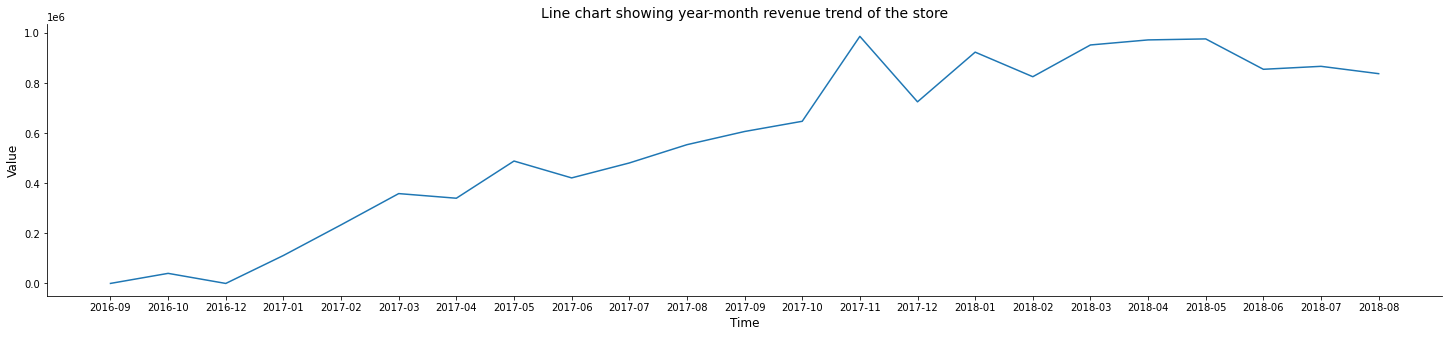

In [ ]:
# plot revenue by yearmonth
# convert datatype of PurchaseYearmonth column into string
df_revenue['PurchaseYearMonth'] = df_revenue['PurchaseYearMonth'].astype('string') 
# define figure
plt.figure(figsize=(25,5))
sns.lineplot(data = df_revenue, x= 'PurchaseYearMonth', y= 'revenue')
plt.title('Line chart showing year-month revenue trend of the store', fontsize =14)
plt.xlabel('Time', fontsize =12)
plt.ylabel('Value', fontsize = 12)
sns.despine()
plt.show()

* We can see that there was an upward trend in the total amount of revenue over 2-year period.  
* The trend reached its peak in Nov 2017 due to Black friday

In [ ]:
# calculate the percentage change between the current and prior month
df_revenue['MonthlyGrowth'] = df_revenue['revenue'].pct_change()
df_revenue.head()

,PurchaseYearMonth,revenue,MonthlyGrowth
0,2016-09,134.97,NaN
1,2016-10,40325.11,297.770912
2,2016-12,10.90,-0.999730
3,2017-01,111798.36,10255.730275
4,2017-02,234223.40,1.095052


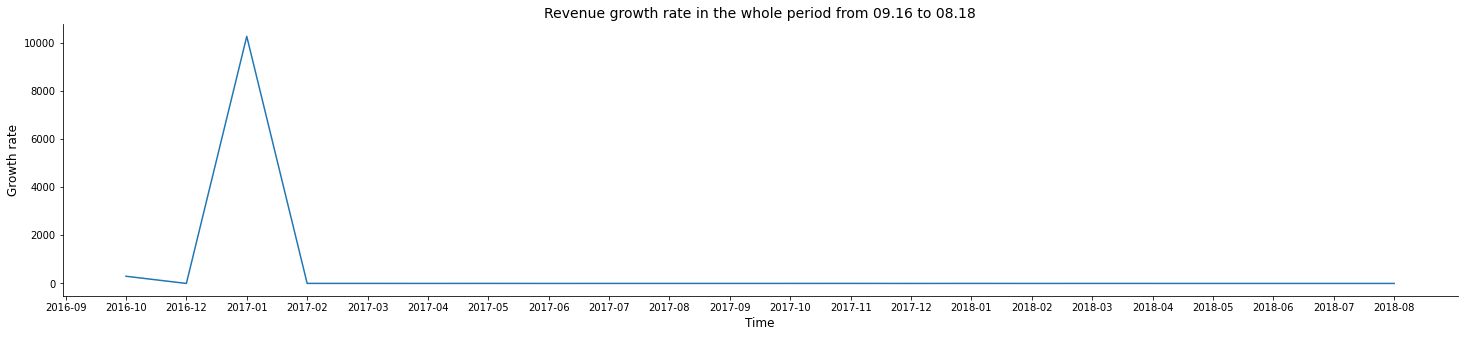

In [ ]:
# plot line chart showing revenue growth 
plt.figure(figsize=(25,5))
sns.lineplot(data = df_revenue, x= 'PurchaseYearMonth', y= 'MonthlyGrowth')
plt.title('Revenue growth rate in the whole period from 09.16 to 08.18', fontsize =14)
plt.xlabel('Time', fontsize =12)
plt.ylabel('Growth rate', fontsize = 12)
sns.despine()
plt.show()

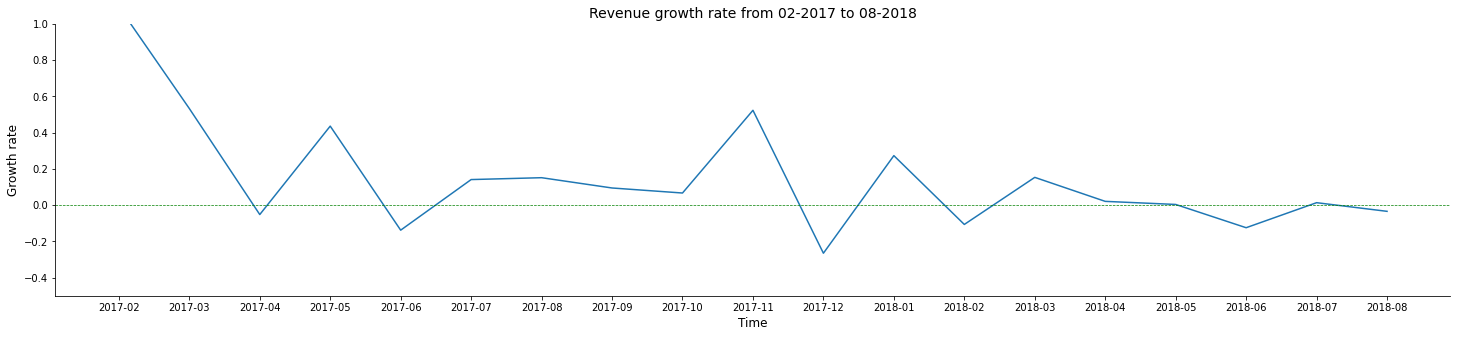

In [ ]:
# plot line chart showing revenue growth from 02-107 to 08-2018
plt.figure(figsize=(25,5))
sns.lineplot(data = df_revenue.iloc[4:], x= 'PurchaseYearMonth', y= 'MonthlyGrowth')
plt.axhline(y=0, color='green', linestyle='--',linewidth=0.7)
plt.title('Revenue growth rate from 02-2017 to 08-2018', fontsize =14)
plt.xlabel('Time', fontsize =12)
plt.ylabel('Growth rate', fontsize = 12)
plt.ylim(-0.5,1)
sns.despine()
plt.show()

## Calculate retention rate

In [ ]:
# Calculate number of unique customers each month
active_customer_monthly = df_orders.groupby('PurchaseYearMonth')['customer_unique_id'].nunique().reset_index()
active_customer_monthly

,PurchaseYearMonth,customer_unique_id
0,2016-09,1
1,2016-10,262
2,2016-12,1
3,2017-01,718
4,2017-02,1630
5,2017-03,2508
6,2017-04,2274
7,2017-05,3479
8,2017-06,3076
9,2017-07,3802


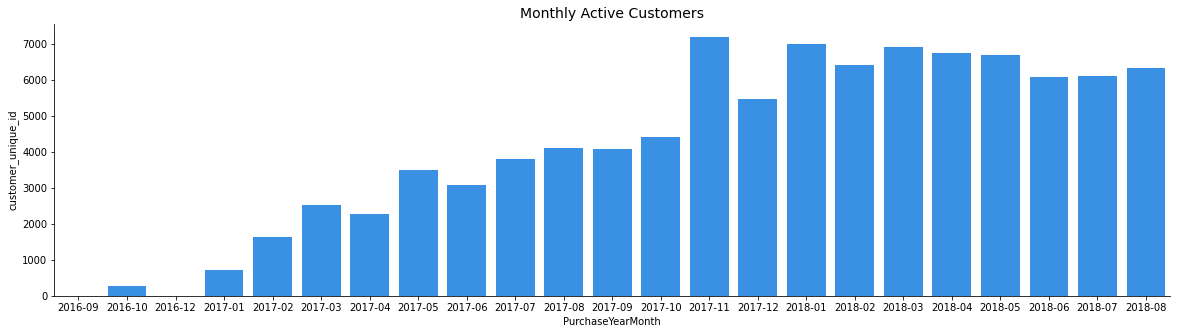

In [ ]:
# plot monthly active customers
plt.figure(figsize=(20,5))
sns.barplot(data= active_customer_monthly, x= "PurchaseYearMonth", y= 'customer_unique_id', color= 'dodgerblue')
plt.title('Monthly Active Customers',fontsize=14)
sns.despine()
plt.show()

In [ ]:
# first purchase date
df_min_purchase = df_orders.groupby('customer_unique_id').min()['order_purchase_timestamp'].reset_index()
df_min_purchase.columns = ['customer_unique_id', 'MinPurchaseYearMonth']
df_min_purchase['MinPurchaseYearMonth'] = df_min_purchase['MinPurchaseYearMonth'].dt.to_period('M')
df_min_purchase.head()

,customer_unique_id,MinPurchaseYearMonth
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11


In [ ]:
# merge 2 dataset into one
df_merge = pd.merge(df_orders, df_min_purchase, how= 'inner', on='customer_unique_id')
# add new column to classify customer type
df_merge['customer_type'] = df_merge.apply(lambda row: "Existing" if row['PurchaseYearMonth']>row['MinPurchaseYearMonth'] else "New",axis=1)
df_merge.head()

,order_id,order_status,order_purchase_timestamp,product_id,quantity,price,customer_unique_id,PurchaseYearMonth,revenue,MinPurchaseYearMonth,customer_type
0,35d3a51724a47ef1d0b89911e39cc4ff,delivered,2016-10-04,c1488892604e4ba5cff5b4eb4d595400,1,39.99,f922896769e9517ea3c630f3c8de86d0,2016-10,39.99,2016-10,New
1,c4f710df20f7d1500da1aef81a993f65,delivered,2016-10-10,c1488892604e4ba5cff5b4eb4d595400,1,39.99,0ecf7f65b5ff3b9e61b637e59f495e0a,2016-10,39.99,2016-10,New
2,b19169c7cb8391fb8561e094d61c531a,delivered,2016-10-10,bdcec8e22b04a8f4241d87bcfe9ea877,3,28.90,0ecf7f65b5ff3b9e61b637e59f495e0a,2016-10,86.70,2016-10,New
3,81e5043198a44ddeb226002ff55d8ad4,delivered,2017-01-09,c1488892604e4ba5cff5b4eb4d595400,2,38.50,853ba75a0b423722ccf270eea3b4cfe4,2017-01,77.00,2017-01,New
4,03b218d39c422c250f389120c531b61f,delivered,2017-01-14,c1488892604e4ba5cff5b4eb4d595400,1,38.50,c83d504c46170342ddbc93c762e0e4ec,2017-01,38.50,2017-01,New


In [ ]:
# count the number of customers in each type
df_merge['customer_type'].value_counts()

New         98149
Existing     2047
Name: customer_type, dtype: int64

In [ ]:
# Compute number of new customers by time
new_customer_by_time = df_merge[df_merge['customer_type']=='New'].groupby('PurchaseYearMonth')['customer_unique_id'].nunique()
new_customer_by_time

PurchaseYearMonth
2016-09       1
2016-10     262
2016-12       1
2017-01     717
2017-02    1628
2017-03    2503
2017-04    2256
2017-05    3451
2017-06    3037
2017-07    3752
2017-08    4057
2017-09    4004
2017-10    4328
2017-11    7060
2017-12    5338
2018-01    6842
2018-02    6288
2018-03    6774
2018-04    6582
2018-05    6506
2018-06    5878
2018-07    5949
2018-08    6144
Freq: M, Name: customer_unique_id, dtype: int64

In [ ]:
# Compute number of new customers by time
existing_customer_by_time = df_merge[df_merge['customer_type']=='Existing'].groupby('PurchaseYearMonth')['customer_unique_id'].nunique()
existing_customer_by_time

PurchaseYearMonth
2017-01      1
2017-02      2
2017-03      5
2017-04     18
2017-05     28
2017-06     39
2017-07     50
2017-08     57
2017-09     79
2017-10     89
2017-11    123
2017-12    112
2018-01    132
2018-02    112
2018-03    140
2018-04    162
2018-05    187
2018-06    183
2018-07    151
2018-08    166
Freq: M, Name: customer_unique_id, dtype: int64

In [ ]:
# Compute the ratio between number of new customers and existing customers throughout the time. 
customer_ratio = new_customer_by_time / existing_customer_by_time
customer_ratio = customer_ratio.reset_index()
customer_ratio

,PurchaseYearMonth,customer_unique_id
0,2016-09,NaN
1,2016-10,NaN
2,2016-12,NaN
3,2017-01,717.000000
4,2017-02,814.000000
5,2017-03,500.600000
6,2017-04,125.333333
7,2017-05,123.250000
8,2017-06,77.871795
9,2017-07,75.040000


* From 09-2016 to 12-2016, there is no existing customers. Therefore, the customer ratio on this period is NaN

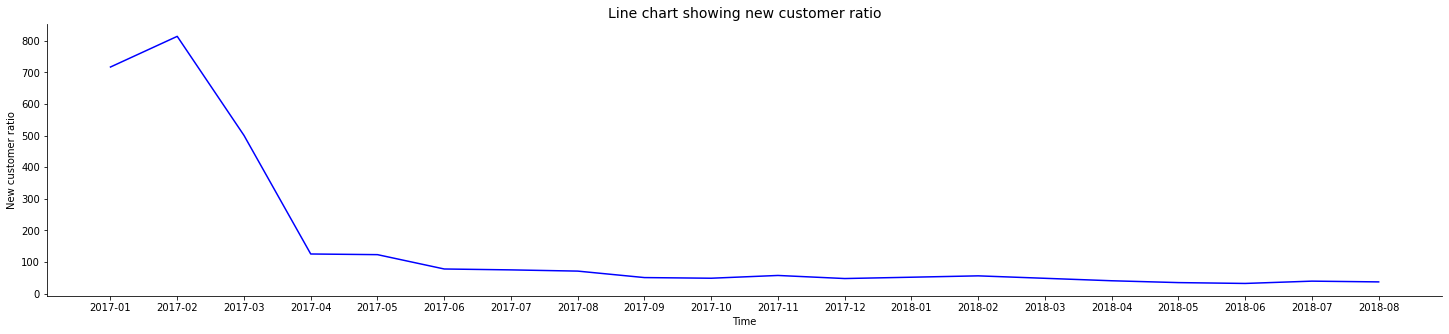

In [ ]:
# convert datatype of PurchaseYearMonth col into string
customer_ratio['PurchaseYearMonth'] = customer_ratio['PurchaseYearMonth'].astype('string')
# plot chart showing new customer ratio
plt.figure(figsize=(25,5))
sns.lineplot(data= customer_ratio, x= 'PurchaseYearMonth', y = 'customer_unique_id', color='blue')
plt.title('Line chart showing new customer ratio', fontsize =14)
plt.xlabel("Time")
plt.ylabel("New customer ratio")
sns.despine()
plt.show()

* As we can see from 01/2017 to 04/2017, the new customers were in the majority, and just a few customers were existing. The existing customers started to increase from 04/2017 onwards. That was the reason why the line chart started to stay the same for the rest of the period

In [ ]:
# Calculate the Revnue by New and Existing User by PurchaseYearMonth
cus_type_revenue = df_merge.groupby(['PurchaseYearMonth','customer_type'])['revenue'].sum().reset_index()
cus_type_revenue

,PurchaseYearMonth,customer_type,revenue
0,2016-09,New,134.97
1,2016-10,New,40325.11
2,2016-12,New,10.90
3,2017-01,Existing,10.90
4,2017-01,New,111787.46
5,2017-02,Existing,76.12
6,2017-02,New,234147.28
7,2017-03,Existing,517.79
8,2017-03,New,358681.06
9,2017-04,Existing,2031.75


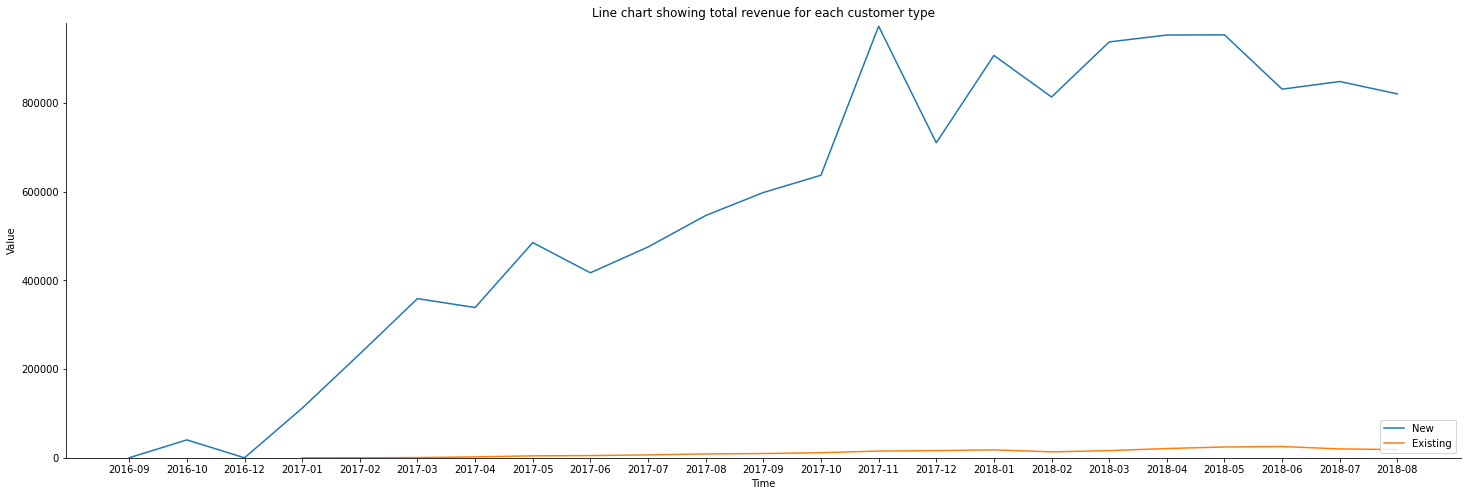

In [ ]:
# convert dtype into string
cus_type_revenue['PurchaseYearMonth'] = cus_type_revenue['PurchaseYearMonth'].astype('string') 
# plot revenue for each customer type
plt.figure(figsize=(25,8))
sns.lineplot(data= cus_type_revenue, x="PurchaseYearMonth", y ='revenue', hue='customer_type')
plt.title('Line chart showing total revenue for each customer type', fontsize =12)
plt.xlabel('Time')
plt.ylabel('Value')
plt.ylim(0,980000)
plt.legend(loc='lower right')
sns.despine()
plt.show()

* From the chart we can conclude that the revenue of this store relies heavily on new customers

In [ ]:
# calculate the total revenue made by each customerid each month
cus_revenue_monthly = df_merge.groupby(['customer_unique_id','PurchaseYearMonth'])['revenue'].sum().reset_index()
cus_revenue_monthly

,customer_unique_id,PurchaseYearMonth,revenue
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,18.90
2,0000f46a3911fa3c0805444483337064,2017-03,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11,180.00
...,...,...,...
95189,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1570.00
95190,fffea47cd6d3cc0a88bd621562a9d061,2017-12,64.89
95191,ffff371b4d645b6ecea244b27531430a,2017-02,89.90
95192,ffff5962728ec6157033ef9805bacc48,2018-05,115.00


In [ ]:
# transpose into wide table
df_retention = pd.pivot_table(data= cus_revenue_monthly, index= 'PurchaseYearMonth',
                              columns='customer_unique_id' ,
                              aggfunc= 'count'  ,values='revenue',
                              fill_value = 0 )
df_retention

customer_unique_id,0000366f3b9a7992bf8c76cfdf3221e2,0000b849f77a49e4a4ce2b2a4ca5be3f,0000f46a3911fa3c0805444483337064,0000f6ccb0745a6a4b88665a16c9f078,0004aac84e0df4da2b147fca70cf8255,0004bd2a26a76fe21f786e4fbd80607f,00050ab1314c0e55a6ca13cf7181fecf,00053a61a98854899e70ed204dd4bafe,0005e1862207bf6ccc02e4228effd9a0,0005ef4cd20d2893f0d9fbd94d3c0d97,0006fdc98a402fceb4eb0ee528f6a8d4,00082cbe03e478190aadbea78542e933,00090324bbad0e9342388303bb71ba0a,000949456b182f53c18b68d6babc79c1,000a5ad9c4601d2bbdd9ed765d5213b3,000bfa1d2f1a41876493be685390d6d3,000c8bdb58a29e7115cfc257230fb21b,000d460961d6dbfa3ec6c9f5805769e1,000de6019bb59f34c099a907c151d855,000e309254ab1fc5ba99dd469d36bdb4,000ec5bff359e1c0ad76a81a45cb598f,000ed48ceeb6f4bf8ad021a10a3c7b43,000fbf0473c10fc1ab6f8d2d286ce20c,0010a452c6d13139e50b57f19f52e04e,0010fb34b966d44409382af9e8fd5b77,001147e649a7b1afd577e873841632dd,00115fc7123b5310cf6d3a3aa932699e,0011805441c0d1b68b48002f1d005526,0011857aff0e5871ce5eb429f21cdaf5,0011c98589159d6149979563c504cb21,0012929d977a8d7280bb277c1e5f589d,0014a5a58da615f7b01a4f5e194bf5ea,0015752e079902b12cd00b9b7596276b,00172711b30d52eea8b313a7f2cced02,00191a9719ef48ebb5860b130347bf33,001926cef41060fae572e2e7b30bd2a4,001928b561575b2821c92254a2327d06,00196c4c9a3af7dd2ad10eade69c926f,00196fdb2bf9edfc35e88ebfbcf8d781,0019da6aa6bcb27cc32f1249bd12da05,...,ffe4c3aa14d4702fb11fe5b3c4dd755c,ffe4d6bcc48632f0bb1bedf53702cc4b,ffe6efca3c7e6a06bad0a6a883280a93,ffe76cb2f4bb39384c432d65ece67441,ffe7752edcf14b5819058b1948e02f3a,ffe780a8995715d9560ca10f3351710f,ffe8f2fc0cee48f79934bd2c506fafc0,ffe9102bb78a76921ba0ff3c4659616a,ffe96201d466b0e0dc8139850be29d5d,ffe96c782a5bc522bd8bad3bc638981a,ffe9be10b9a58c5464d833e8b1b2c632,ffe9e41fbd14db4a7361347c56af5447,ffeb904468642a1ce663a322629801cb,ffebb6424578e7bb153322da9d65634f,ffec10ad4229ba46818560e1c8b40a68,ffec490ab531184a483efe2eedd68908,ffecceca389973ef16660d58696f281e,ffeddf8aa7cdecf403e77b2e9a99e2ea,ffedff0547d809c90c05c2691c51f9b7,ffee94d548cef05b146d825a7648dab4,ffeefd086fc667aaf6595c8fe3d22d54,ffef0ffa736c7b3d9af741611089729b,fff1afc79f6b5db1e235a4a6c30ceda7,fff1bdd5c5e37ca79dd74deeb91aa5b6,fff22793223fe80c97a8fd02ac5c6295,fff2ae16b99c6f3c785f0e052f2a9cfb,fff3a9369e4b7102fab406a334a678c3,fff3e1d7bc75f11dc7670619b2e61840,fff5eb4918b2bf4b2da476788d42051c,fff699c184bcc967d62fa2c6171765f7,fff7219c86179ca6441b8f37823ba3d3,fff96bc586f78b1f070da28c4977e810,fffa431dd3fcdefea4b1777d114144f2,fffb09418989a0dbff854a28163e47c6,fffbf87b7a1a6fa8b03f081c5f51a201,fffcf5a5ff07b0908bd4e2dbc735a684,fffea47cd6d3cc0a88bd621562a9d061,ffff371b4d645b6ecea244b27531430a,ffff5962728ec6157033ef9805bacc48,ffffd2657e2aad2907e67c3e9daecbeb
PurchaseYearMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2017-03,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-05,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# create a function
lst_count = []
lst_retain = []
lst_month = []
for i in range(len(df_retention)-1):
  #df_retention.index
  last_month = df_retention.iloc[i] 
  this_month = df_retention.iloc[i+1]
  # total number of customers of this month
  total_count = df_retention.iloc[i+1].sum()
  # total number of Retained cus
  retain_user_count = ((this_month+last_month)==2).sum()
  lst_count.append(total_count)
  lst_retain.append(retain_user_count)
  lst_month.append(df_retention.index[i+1])
print(lst_count)
print(lst_retain)
print(lst_month)

[262, 1, 718, 1630, 2508, 2274, 3479, 3076, 3802, 4114, 4083, 4417, 7183, 5450, 6974, 6400, 6914, 6744, 6693, 6061, 6100, 6310]
[0, 0, 1, 2, 3, 11, 14, 16, 16, 23, 32, 32, 37, 41, 16, 27, 23, 31, 45, 38, 26, 37]
[Period('2016-10', 'M'), Period('2016-12', 'M'), Period('2017-01', 'M'), Period('2017-02', 'M'), Period('2017-03', 'M'), Period('2017-04', 'M'), Period('2017-05', 'M'), Period('2017-06', 'M'), Period('2017-07', 'M'), Period('2017-08', 'M'), Period('2017-09', 'M'), Period('2017-10', 'M'), Period('2017-11', 'M'), Period('2017-12', 'M'), Period('2018-01', 'M'), Period('2018-02', 'M'), Period('2018-03', 'M'), Period('2018-04', 'M'), Period('2018-05', 'M'), Period('2018-06', 'M'), Period('2018-07', 'M'), Period('2018-08', 'M')]


In [ ]:
# create a dataframe to calculate retention rate
dict_ = {'RetainedUserCount':lst_retain,'TotalCount':lst_count,'PurchaseYearMonth':df_retention.reset_index()['PurchaseYearMonth'].iloc[1:]}
df_retain = pd.DataFrame(dict_)
# calculate retention rate
df_retain['RetentionRate'] = df_retain['RetainedUserCount']/df_retain['TotalCount']
df_retain

,RetainedUserCount,TotalCount,PurchaseYearMonth,RetentionRate
1,0,262,2016-10,0.000000
2,0,1,2016-12,0.000000
3,1,718,2017-01,0.001393
4,2,1630,2017-02,0.001227
5,3,2508,2017-03,0.001196
6,11,2274,2017-04,0.004837
7,14,3479,2017-05,0.004024
8,16,3076,2017-06,0.005202
9,16,3802,2017-07,0.004208
10,23,4114,2017-08,0.005591


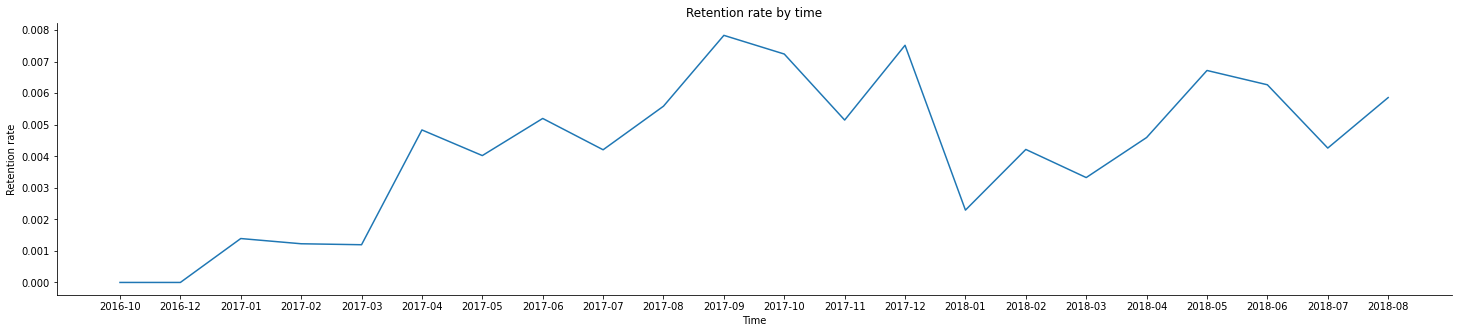

In [ ]:
# change datatype
df_retain['PurchaseYearMonth'] = df_retain['PurchaseYearMonth'].astype(str)
# plot the change of retention rate by time 
plt.figure(figsize=(25,5))
sns.lineplot(data = df_retain, x = 'PurchaseYearMonth', y= 'RetentionRate')
plt.title('Retention rate by time', fontsize = 12)
plt.xlabel('Time')
plt.ylabel('Retention rate')
sns.despine()
plt.show()

## Calculate churn rate

Customer churn rate is simply the inverse of customer retention rate

In [ ]:
# calculate churn rate
df_retain['ChurnRate'] =  1- df_retain['RetentionRate']

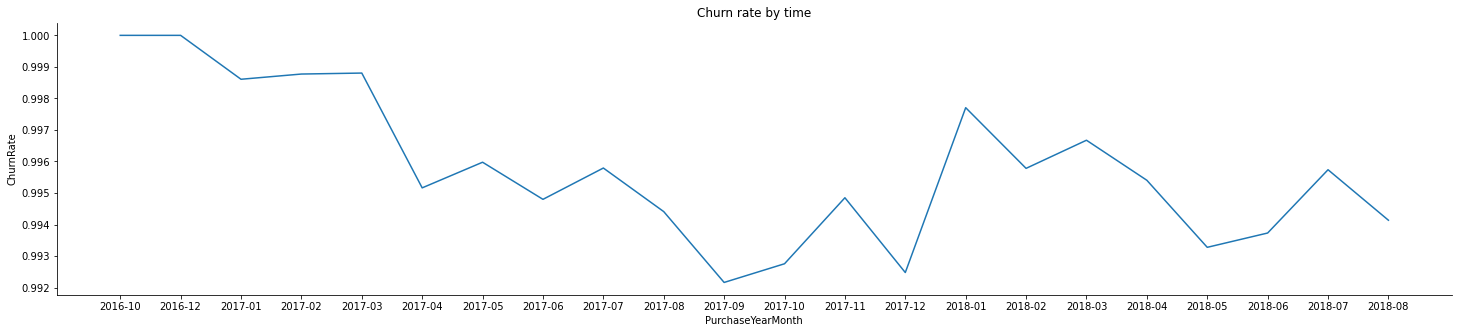

In [ ]:
# plot the change of churn rate by time 
plt.figure(figsize=(25,5))
sns.lineplot(data=df_retain,x='PurchaseYearMonth',y='ChurnRate')
plt.title('Churn rate by time', fontsize =12)
sns.despine()
plt.show()

* During the whole period, the retention rate was always below 0.01% while the churn rate was always high, which meaned that this store did not attempt to retain existing customers or perhaps they did not have any specific marketing strategies to maintain the good relationship with customers